# Маркетинговое исследование для развлекательного приложения Procrastinate Pro+.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Необходимо будет изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# чтение файлов
try: 
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )
except:
    visits, orders, costs = (
        pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    )

In [3]:
display(visits.head(3))
display(orders.head(3))
costs.head(3)

User Id         Region  Device  Channel        Session Start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States     Mac  organic  2019-05-01 14:09:25   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8

Для удобства дальнейшей работы переведем названия столбцов во всех датасетах в нижний регистр и заменим пробелы на символ нижнего подчеркивания `_`.

In [4]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

#### Лог сервера с информацией о посещениях сайта `visits`

In [5]:
print('Количество дубликатов:', visits.duplicated().sum())
print('Количество пропущенных значений:', visits.isna().sum().sum(), '\n')
visits.info()

Количество дубликатов: 0
Количество пропущенных значений: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В данных о визитах нет пропущенных значений и дубликатов. Необходимо преобразовать тип данных о дате и времени `session_start` и `session_end`.

In [6]:
visits.session_start = pd.to_datetime(visits.session_start)
visits.session_end = pd.to_datetime(visits.session_end)

#### Информация о заказах `orders`

In [7]:
print('Количество дубликатов:', orders.duplicated().sum())
print('Количество пропущенных значений:', orders.isna().sum().sum(), '\n')
orders.info()

Количество дубликатов: 0
Количество пропущенных значений: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Также нет пропущенных значений и дубликатов, тип даты `event_dt` необходимо изменить.

In [8]:
orders.event_dt = pd.to_datetime(orders.event_dt)

#### Информация о расходах на рекламу `costs`

In [9]:
print('Количество дубликатов:', costs.duplicated().sum())
print('Количество пропущенных значений:', costs.isna().sum().sum(), '\n')
costs.info()

Количество дубликатов: 0
Количество пропущенных значений: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Дубликатов и пропусков в `costs` также нет, `dt` необходимо перевести в дату.

In [10]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [11]:
# проверим значения регионов, устройств и каналов
display(visits.region.unique())
display(visits.device.unique())
visits.channel.unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [12]:
# проверим наличие ошибок в датах и времени - когда окончание сессии раньше начала
visits[visits.session_end < visits.session_start].shape[0]

0

In [13]:
# проверим наличие ошибок в сумме заказа - наличие нулевых и отрицательных значений
orders[orders.revenue <= 0].shape[0]

0

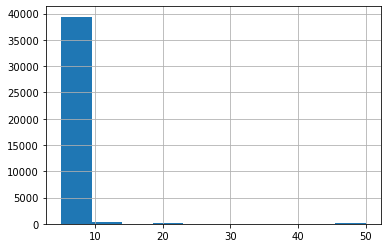

In [14]:
# частотная гистограмма значений суммы заказа
orders.revenue.hist()
plt.show()

Большинство заказов не превышают 10, есть несколько более крупных заказов, скорее всего это соответствует действительности, нельзя с уверенностью сказать о выбросах.

In [15]:
# проверим значения каналов в датасете costs
costs.channel.unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [16]:
# проверим наличие ошибок в расходах на кампанию - наличие нулевых и отрицательных значений
costs[costs.costs <= 0].shape[0]

0

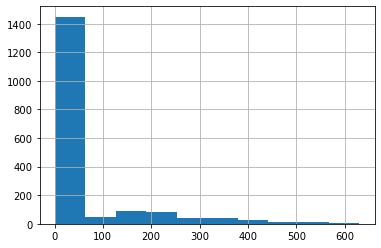

In [17]:
# частотная гистограмма значений расходов на кампанию
costs.costs.hist()
plt.show()

Чаще всего на кампанию расходуется до 50$, однако есть и более дорогостоящие кампании.



На этом этапе обработали и проверили данные:

* загружены и прочитаны три датасета с данными
* названия столбцов во всех датасетах приведены к единому виду
* после проверки не было обнаружено наличия дубликатов и пропущенных значений в данных
* данные о дате и времени были приведены к соответствующему типу данных
* проверены данные о регионах, устройствах и каналах привлечения - аномалий не обнаружено
* проверены значения даты и времени начала и конца сессий - ошибок не обнаружено
* проверены данные о суммах заказов и расходах на рекламные компании - ошибок также не было обнаружено
    


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [18]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [19]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [20]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [24]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [26]:
# составим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [27]:
profiles.dt.max()

datetime.date(2019, 10, 27)

In [28]:
profiles.dt.min()

datetime.date(2019, 5, 1)

Составили профили пользователей. Максимальная и минимальная даты соответствуют описанию - данные представлены с 1 мая по 27 октября 2019 года.

In [29]:
# сводная таблица количества всех пользователей и платящих пользователей для разных регионов
users_by_region = (profiles
                   .pivot_table(index='region', values='payer', aggfunc=['count', 'sum'])
                   .reset_index()
                   .rename(columns={'count': 'users', 'sum':'users_with_payment'})
                  )
users_by_region.columns = users_by_region.columns.droplevel(1) # удаляем мультииндекс


# доля пользователей от общего количества
users_by_region['percent_of_users'] = (users_by_region.users / users_by_region.users.sum()) * 100
# доля платящих пользователей в процентах
users_by_region['percent_of_users_with_payment'] = (users_by_region.users_with_payment 
                                                    / users_by_region.users) * 100 

users_by_region.sort_values('percent_of_users_with_payment', ascending=False).style.background_gradient()

Наибольшее количество пользователей из США - в 2 раза больше, чем суммарно из всех остальных представленных стран. Доля платящих пользователей также наибольшая в США - `6.9%` американских пользователей производили оплату. Из Германии, Великобритании и Франции примерно одинаковое количество как пользователей, так и платящих пользователей среди них.

In [30]:
# сводная таблица количества всех пользователей и платящих пользователей для разных устройств
users_by_device = (profiles
                   .pivot_table(index='device', values='payer', aggfunc=['count', 'sum'])
                   .reset_index()
                   .rename(columns={'count': 'users', 'sum':'users_with_payment'})
                  )
users_by_device.columns = users_by_device.columns.droplevel(1) # удаляем мультииндекс
# доля пользователей от общего количества
users_by_device['percent_of_users'] = (users_by_device.users / users_by_device.users.sum()) * 100
# доля платящих пользователей в процентах
users_by_device['percent_of_users_with_payment'] = (users_by_device.users_with_payment 
                                                    / users_by_device.users) * 100
users_by_device.sort_values('percent_of_users_with_payment', ascending=False).style.background_gradient()

Явного лидера по доле платящих пользователей среди разных устройств нет, для пользователей `Mac`, `iPhone` и `Andorid` разница в пределах половины процента (от `5.85%` до `6.36%`). Хуже платят пользователи `PC` - только `5.05%`.

In [31]:
# сводная таблица количества всех пользователей и платящих пользователей для разных источников привлечения
users_by_channel = (profiles
                   .pivot_table(index='channel', values='payer', aggfunc=['count', 'sum'])
                   .reset_index()
                   .rename(columns={'count': 'users', 'sum':'users_with_payment'})
                  )
users_by_channel.columns = users_by_channel.columns.droplevel(1) # удаляем мультииндекс
# доля пользователей от общего количества
users_by_channel['percent_of_users'] = (users_by_channel.users / users_by_channel.users.sum()) * 100
# доля платящих пользователей в процентах
users_by_channel['percent_of_users_with_payment'] = (users_by_channel.users_with_payment 
                                                    / users_by_channel.users) * 100
users_by_channel.sort_values('percent_of_users_with_payment', ascending=False).style.background_gradient()

Наибольший процент платящих среди пользователей, привлеченных с помощью `FaceBoom`. Больше всего пользователей посетили сайт без какого-то маркетингового источника привлечения, однако доля платящих среди них наименьшая - всего 2 процента.



На данном этапе исследовали данные и составили профили пользователей. Минимальная дата привлечения - 1 мая 2019 года, максимальная - 27 октября 2019 года.
    
Большинство пользователей из США (100002 пользователя) - это 66.7% от общего количества. Также доля платящих пользователей в США наивысшая - 6.9%. В Германии (14981 пользователь, 4.1% платящих), Великобритании (17575 пользователей, 4.0% платящих) и Франции (17450 пользователей, 3.8% платящих) схожие показатели как общих, так и платящих пользователей. 
    
Наибольшее количество пользователей - пользователи iPhone - 36.3% от общего количества. Следующими за ними идут пользователи Android - 23.4%. Пользователей PC и Mac примерно одинаковое количество - 20.3% и 20.0% соответственно. Таким образом, можно сказать, что преобладают пользователи мобильных устройств - 59.7% против 40.3% пользователей компьютеров. Наиболее платящие пользователи - пользователи Mac и iPhone, среди пользователей этих устройств 6.4% и 6.2% платящих пользователей соответственно. Только 5% пользователей PC производят оплату.
    
Для разных каналов привлечения заметна существенная разница в доле платящих пользователей (от 2 до 12 процентов). Лучше остальных платят пользователи, привлеченные через канал FaceBoom - 12.2%. При этом с помощью данного источника было привлечено и наибольшее количество пользователей (19.4% от общего количества), за исключением органических пользователей. Второй по количеству привлеченных пользователей источник TipTop имеет всего 9.6% платящих среди них.


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [32]:
round(profiles.acquisition_cost.sum(), 1)

105497.3

In [33]:
cost_channel = (
    profiles
    .pivot_table(index='channel', values='acquisition_cost', aggfunc='sum')
    .sort_values('acquisition_cost', ascending=False)
)
cost_channel['%'] = cost_channel.acquisition_cost / profiles.acquisition_cost.sum() * 100
cost_channel

acquisition_cost          %
channel                                        
TipTop                      54751.30  51.898295
FaceBoom                    32445.60  30.754910
WahooNetBanner               5151.00   4.882589
AdNonSense                   3911.25   3.707441
OppleCreativeMedia           2151.25   2.039152
RocketSuperAds               1833.00   1.737485
LeapBob                      1797.60   1.703930
lambdaMediaAds               1557.60   1.476436
MediaTornado                  954.48   0.904744
YRabbit                       944.22   0.895018
organic                         0.00   0.000000

Всего на маркетинг было потрачено `105497.3`. Более половины всего бюджета было потрачено на `TipTop`. Также большие траты на источник `FaceBoom`.

In [34]:
# добавим столбец с номерами недель
profiles['week'] = profiles['first_ts'].dt.isocalendar().week

In [35]:
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  week  
0  2019-05-07 2019-05-01   True          1.088172    19  
1  2019-07-09 2019-07-01  False          1.107237    28  
2  2019-10-01 2019-10-01  False          0.000000    40  
3  2019-08-22 2019-08-01  False          0.988235    34  
4  2019-10-02 2019-10-01  False          0.230769    40

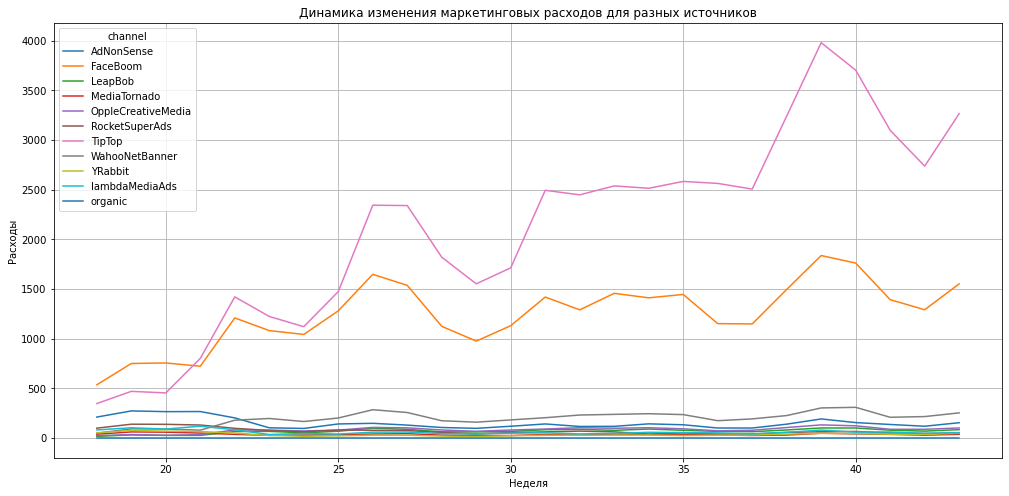

In [36]:
(
    profiles
    .pivot_table(index='week', columns='channel', values='acquisition_cost', aggfunc='sum')
).plot(title='Динамика изменения маркетинговых расходов для разных источников',
       xlabel='Неделя',
       ylabel='Расходы',
       grid=True,
       figsize=(17,8)
      )

plt.show()

Из графика видно, что расходы на маркетинг для `TipTop` и `FaceBoom` в течение всего рассматриваемого периода выше, чем для всех остальных. Динамика трат для этих двух источников схожа, в одни и те же недели расходы либо увеличивались, либо снижались схожим образом, однако начиная с 21-й недели на `TipTop` тратилось больше.

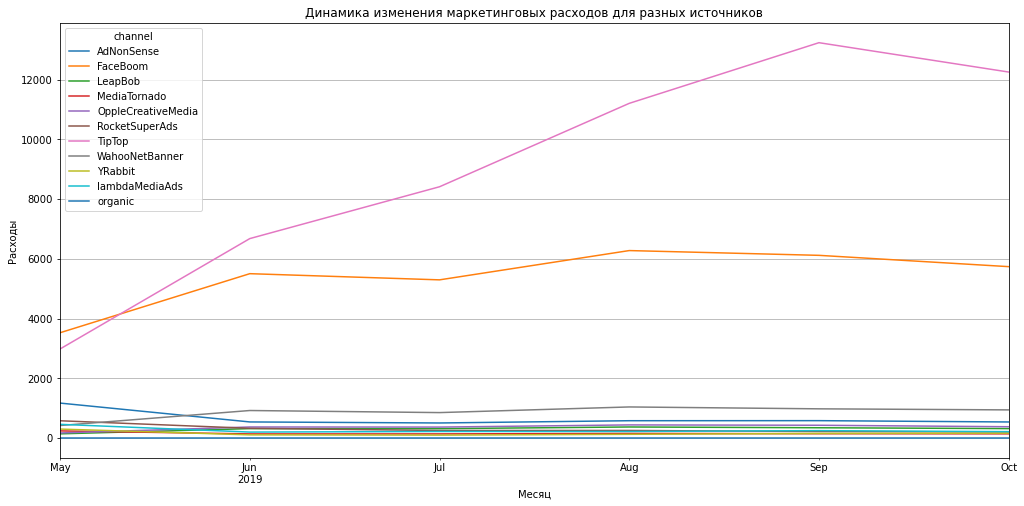

In [37]:
(
    profiles
    .pivot_table(index='month' ,columns='channel', values='acquisition_cost', aggfunc='sum')
).plot(title='Динамика изменения маркетинговых расходов для разных источников',
       xlabel='Месяц',
       ylabel='Расходы',
       grid=True,
       figsize=(17,8)
      )
plt.show()

Динамика расходов по месяцам выглядит схожим образом, что логично. Траты на `TipTop` и `FaceBoom` значительно выше, чем на остальные источники. Расходы для `TipTop` увеличивались до сентября, а для `FaceBoom` до августа, далее траты снижаются.

In [38]:
# сводная таблица для средней стоимости маркетинговых расходов на одного пользователя
cac = (
    profiles
    .pivot_table(index='channel', values='acquisition_cost', aggfunc=['sum', 'count', 'mean'])
    .rename(columns={'sum': 'total_cost', 'count': 'users', 'mean': 'mean_cost'})
    )
cac.columns = cac.columns.droplevel(1)
cac.sort_values('mean_cost', ascending=False).style.background_gradient()

In [39]:
round(profiles[profiles.channel != 'organic'].acquisition_cost.mean(), 2)

1.13

Средняя стоимость маркетинговых расходов на одного пользователя - 1.13$.

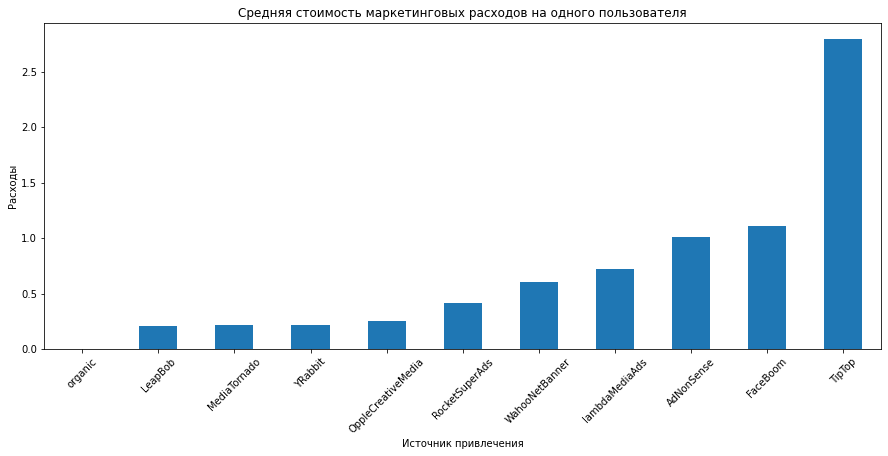

In [40]:
cac.mean_cost.sort_values().plot(kind='bar',
                                title='Средняя стоимость маркетинговых расходов на одного пользователя',
                                xlabel='Источник привлечения',
                                ylabel='Расходы',
                                rot=45, 
                                figsize=(15,6)
                                )
plt.show()

Не смотря на наибольшие траты на `TipTop`, больше пользователей было привлечено с канала `FaceBoom`. Средняя стоимость расходов на одного пользователя максимальная у `TipTop` и более чем в 2 раза превышает у идущего следом `FaceBoom`. Низкая средняя стоимость привлечения клиентов у каналов `LeapBob`, `MediaTornado`, `YRabbit` и `OppleCreativeMedia`.



Всего на маркетинг было потрачено 105497.3, причем более 82% всего бюджета было израсходовано всего на два источника - TipTop (51.9%) и FaceBoom (30.8%). В динамике расходы на эти два канала увеличивались с мая по сентябрь 2019 года, тогда как расходы на остальные источники были примерно одинаковы в течение этого срока. В среднем на одного пользователя (без учета органических пользователей) тратилось 1.13. CAC для канала TipTop в 2.5 раза выше среднего (2.8&#36;). Т.е. не смотря на наибольшие траты на этот источник привлечения, количество и доля платящих пользователей, приходящих с этого канала не так высоки.    



### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [41]:
# зададим момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Т.к. органические пользователи приходят без какого-то привлечения и маркетинговых затрат, то исключим их из анализа окупаемости рекламы.

In [42]:
profiles = profiles.query('channel != "organic"')

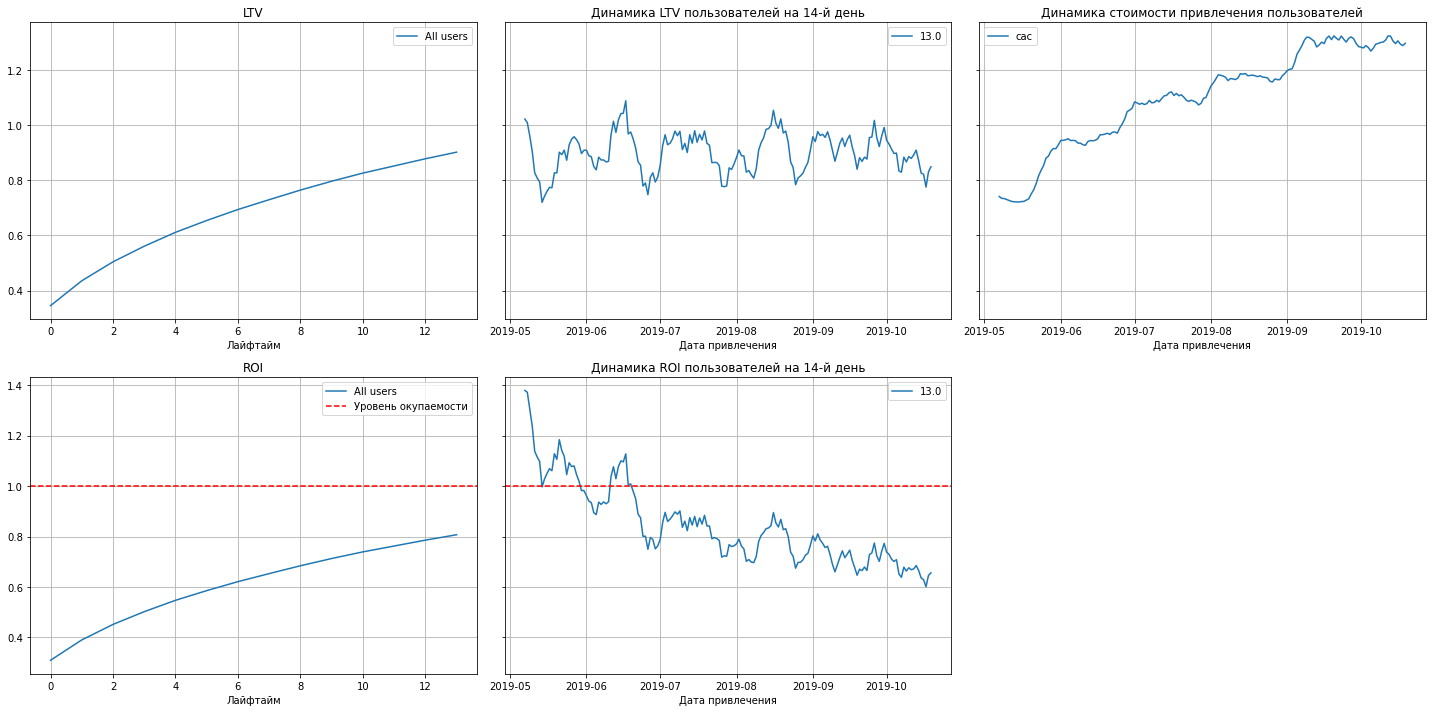

In [43]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

* Реклама не окупается, окупаемость инвестиций `ROI` в конце второй недели чуть выше `80%`.
* Стоимость привлечения пользователей `CAC` растет.
* `LTV` подвержен сезонности, но достаточно стабилен, т.е. качество пользователей не ухудшается.

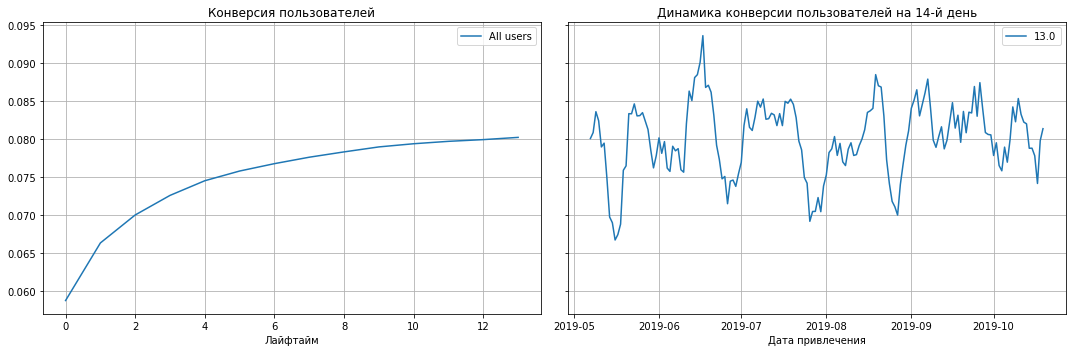

In [44]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Все пользователи конвертируются достаточно хорошо, причем постоянно. К концу второй недели конверсия превышает `8%`. Динамика конверсии стабильна, хоть и подвержена сезонности.

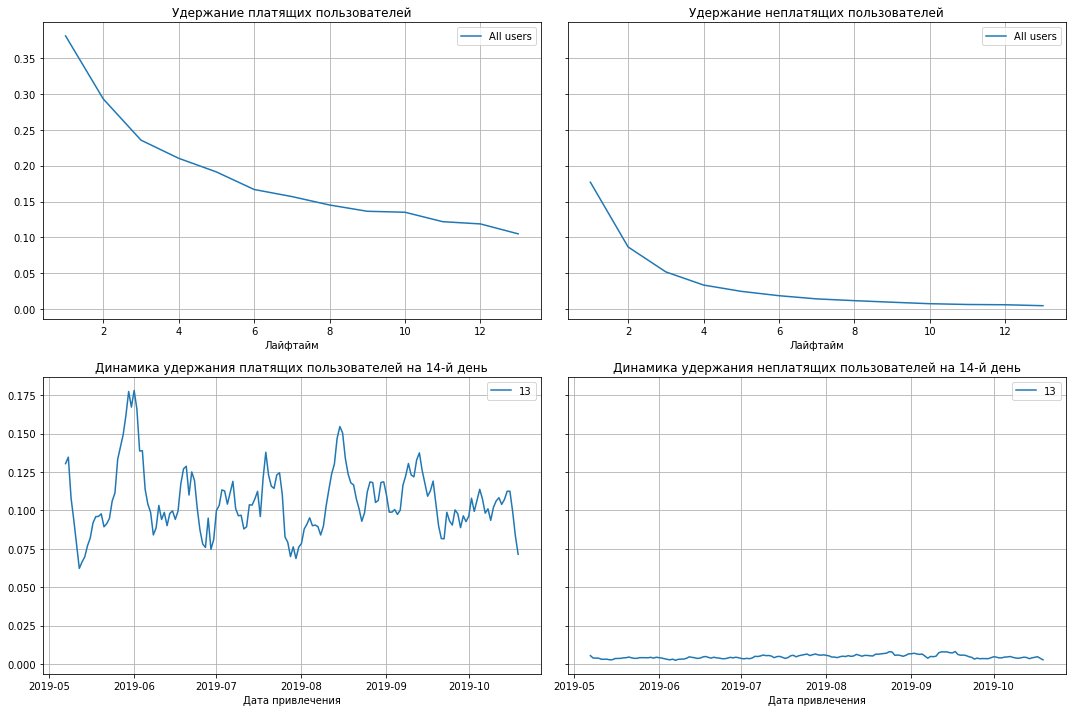

In [45]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Динамика удержания как платящих, так и неплатящих пользователей достаточно стабильна. К концу второй недели удержание платящих пользователей чуть выше `10%`, неплатящих - близко к `0%`.

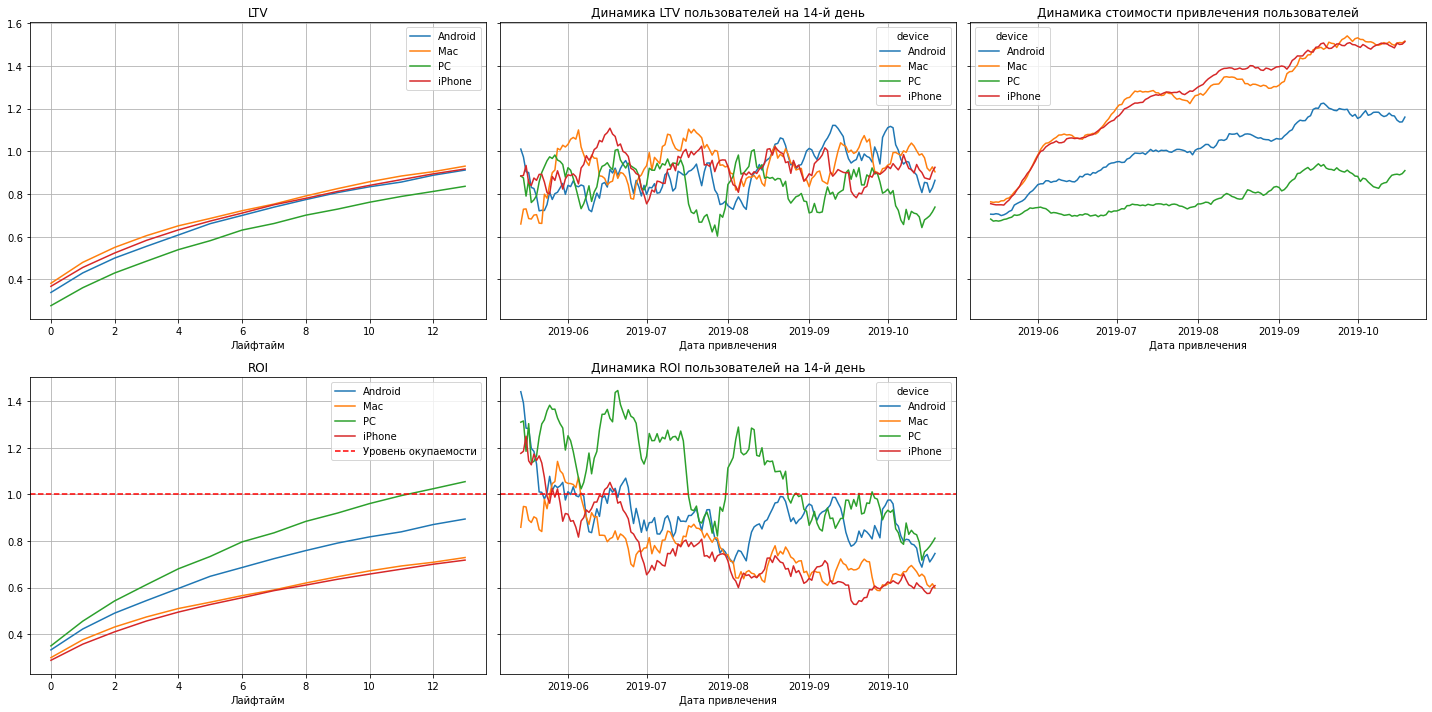

In [46]:
# смотрим окупаемость с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

* К концу второй недели окупаются только пользователи `PC`. Пользователи `Mac` и `iPhone` окупаются хуже остальных.
* При этом пользователи `PC` приносят компании наименьшие доходы.
* Маркетинговые расходы для пользователей `Mac` и `iPhone` выше. К ноябрю они превышают расходы для пользователей `Android` примерно на `30%`, а для `PC` примерно на `60%`. Траты увеличиваются для всех устройств схожим образом.
* Качество пользователей достаточно стабильно и не зависит от устройства.

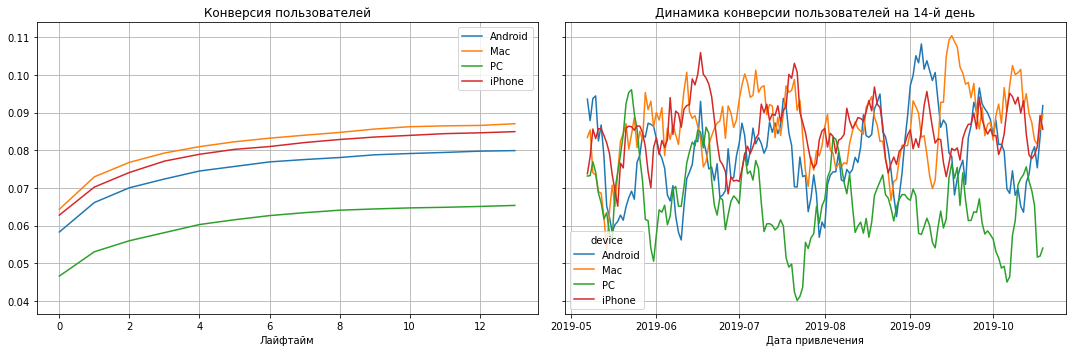

In [47]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей Mac, iPhone и Android находится на хорошем уровне - к концу второй недели выше 8%. Выделяются пользователи PC - только 6.5% пользователей конвертируются за 14 дней.

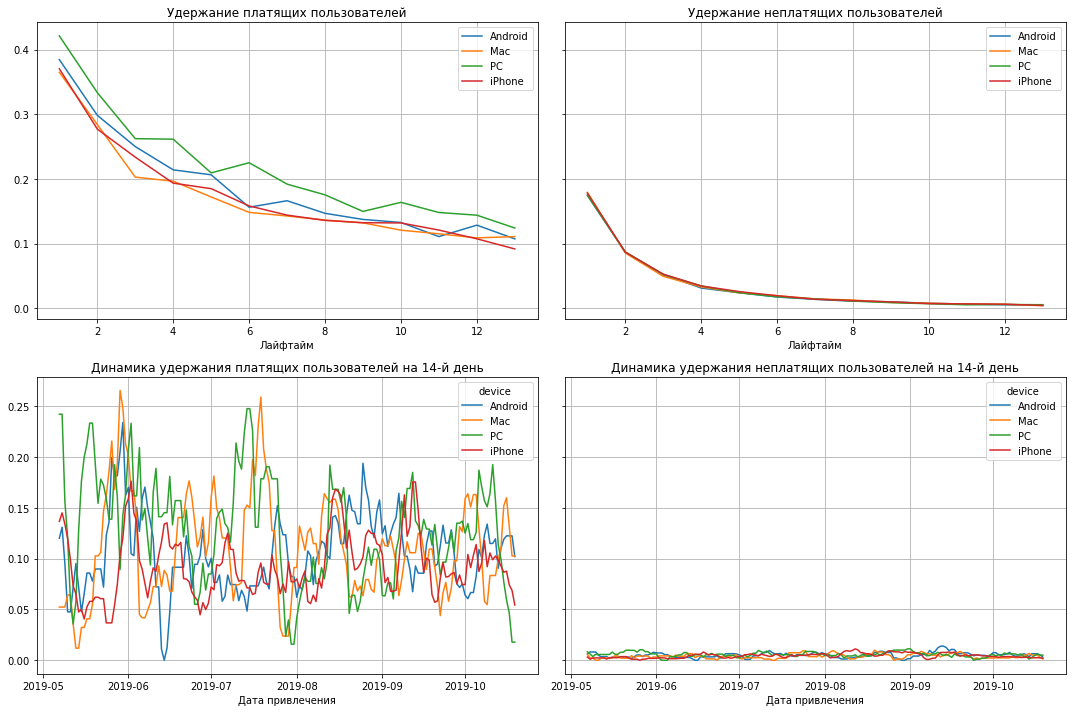

In [48]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Не смотря на меньший процент конверсии, платящие пользователи PC удерживаются несколько лучше остальных. К концу второй недели разница между наилучшим удержанием у PC и наихудшим у пользователей iPhone - 3%. Как платящие, так и неплатящие пользователи удерживаются схожим образом вне зависимости от устройства.

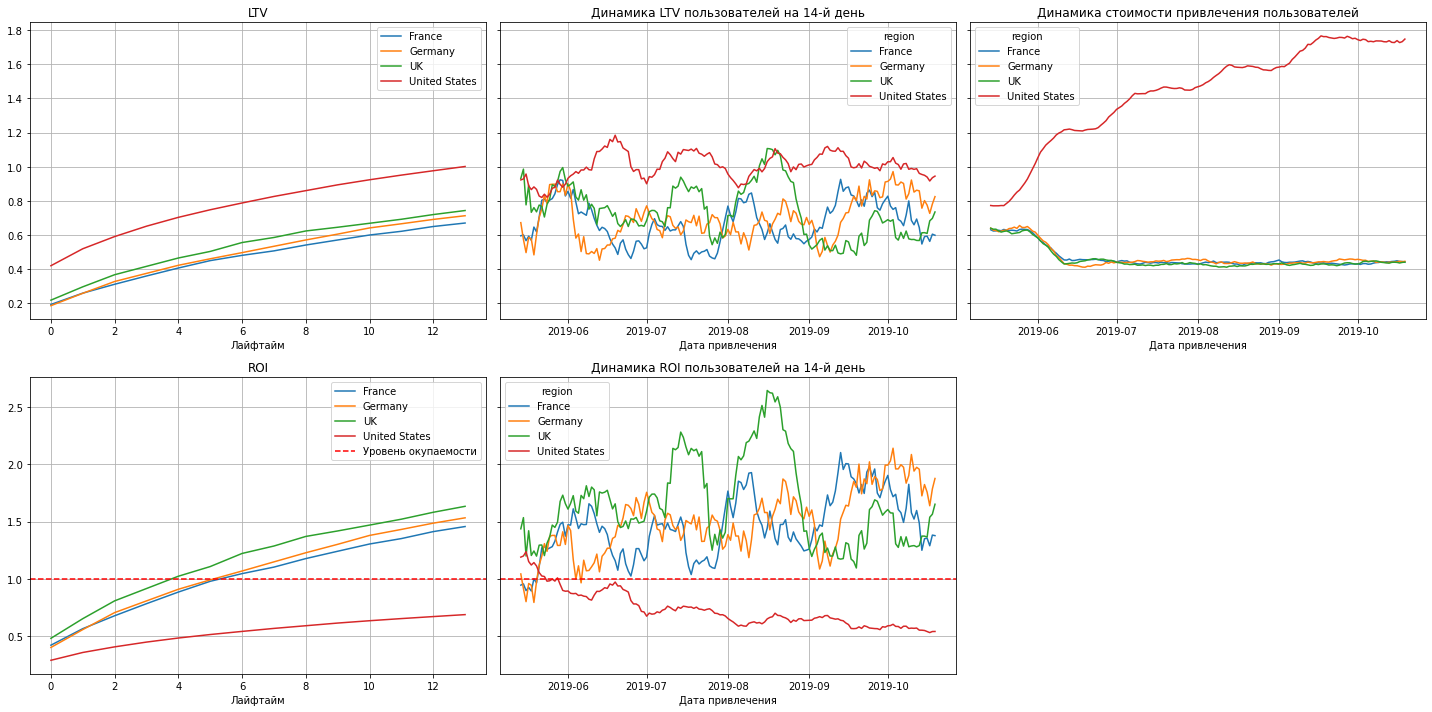

In [49]:
# смотрим окупаемость с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

* Пользователи из Великобритании окупаются с 5-го дня после привлечения, из Франции и Германии - с 6-го дня. Пользователи из США не окупаются к концу второй недели.
* `LTV` пользователей из США выше пользоватлей из других стран более чем на `20%`.
* Стоимость привлечения пользователей из США растет до середины сентября. Для остальных стран после снижения июне `CAC` остается стабильной и примерно одинаковой. В ноябре маркетинговые расходы в США выше примерно на `130%` чем в остальных странах.

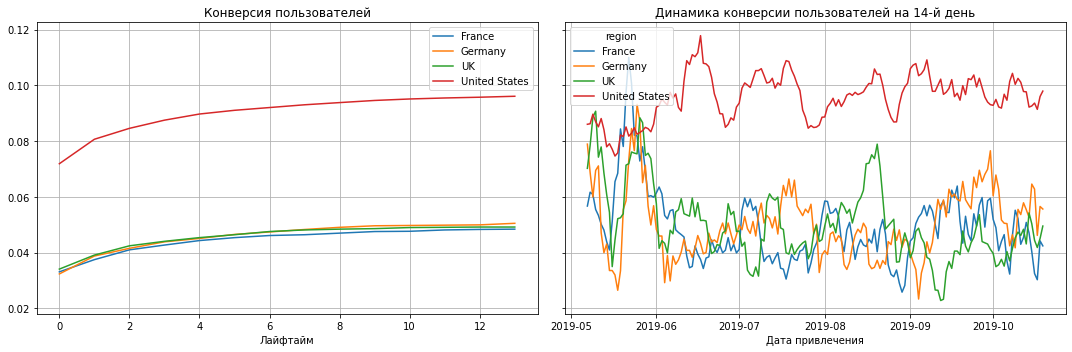

In [50]:
# смотрим конверсию с разбивкой по регионам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Пользователи из США конвертируются значительно лучше пользователей из других стран - к концу второй недели конверсия пользователей из США на 5% выше. В динамике также видна высокая конверсия пользователей из США на протяжении всего срока.

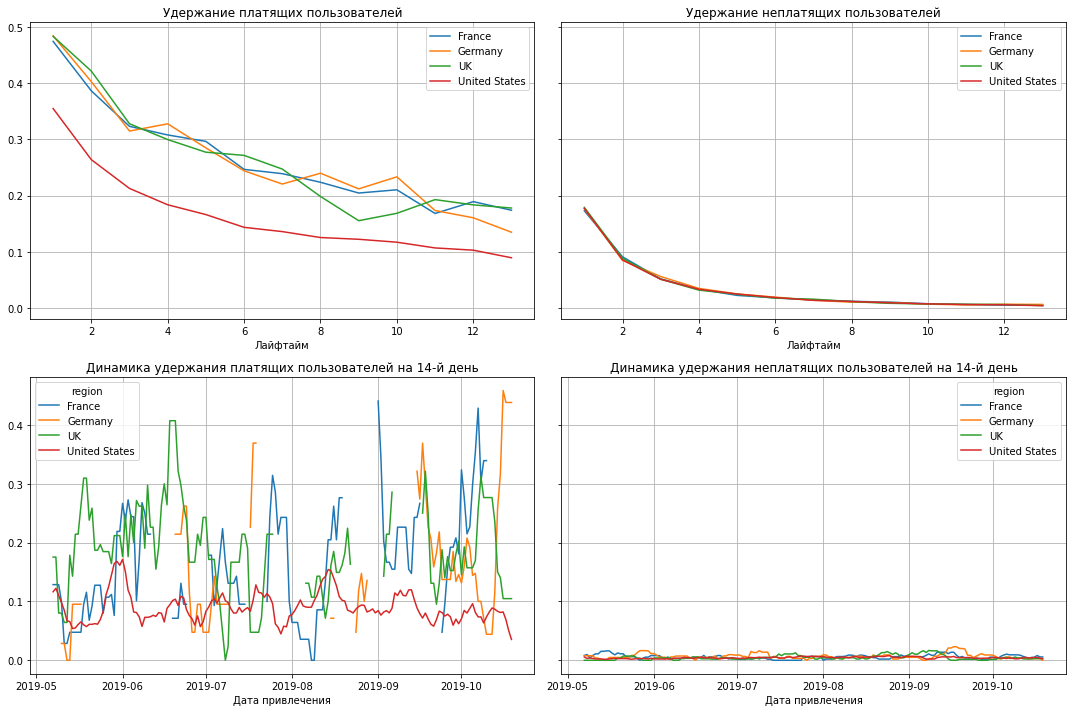

In [51]:
# смотрим удержание с разбивкой по регионам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Не смотря на хорошую конверсию, пользователи из США хуже удерживаются. К концу второй недели удержание платящих пользователей из США ниже, чем пользователей из Франции и Великобритании, почти на 9%.

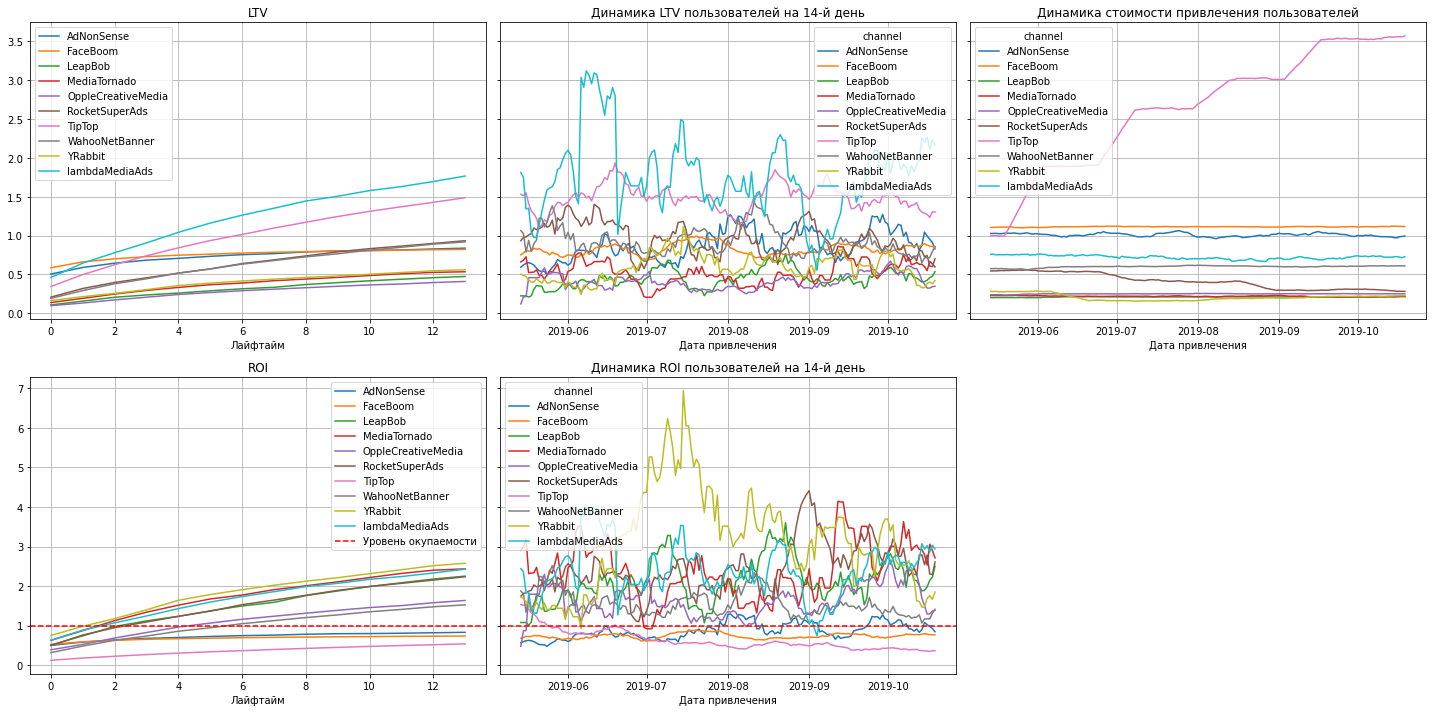

In [52]:
# смотрим окупаемость с разбивкой по каналам привлечения
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

* Все рекламные источники к концу второй недели окупаются, за исключением трех - `TipTop`, `AdNonSense` и `FaceBoom`.
* Стоимость привлечения пользователей растет для канала `TipTop`. Для всех остальных источников стоимость остается стабильной.
* `LTV` пользовтелей, привлеченных с помощью `TipTop` и `lambdaMediaAds` выше остальных более чем на `50%` к концу второй недели.

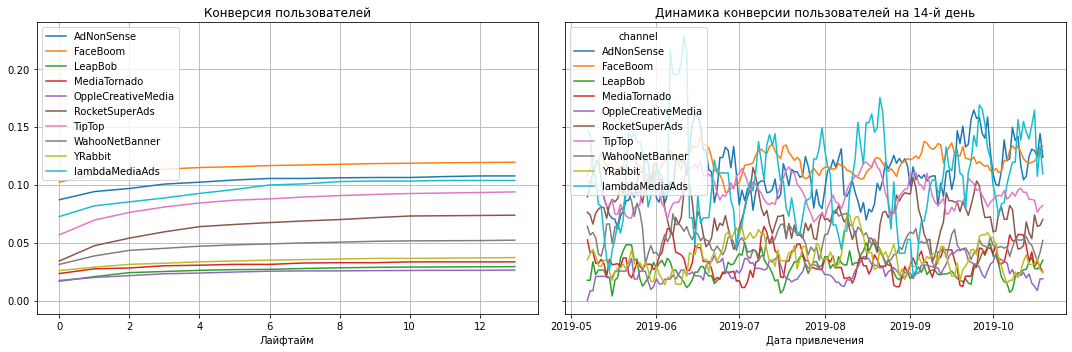

In [53]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Пользователи, привлеченные через каналы FaceBoom, AdNonSense и lambdaMediaAds очень хорошо конвертируются - более 10% за две недели. Не достаточно хорошая конверсия у пользователей, привлеченных с помощью YRabbit, MediaTornado, LeapBob и OppleCreativeMedia - менее 5%.

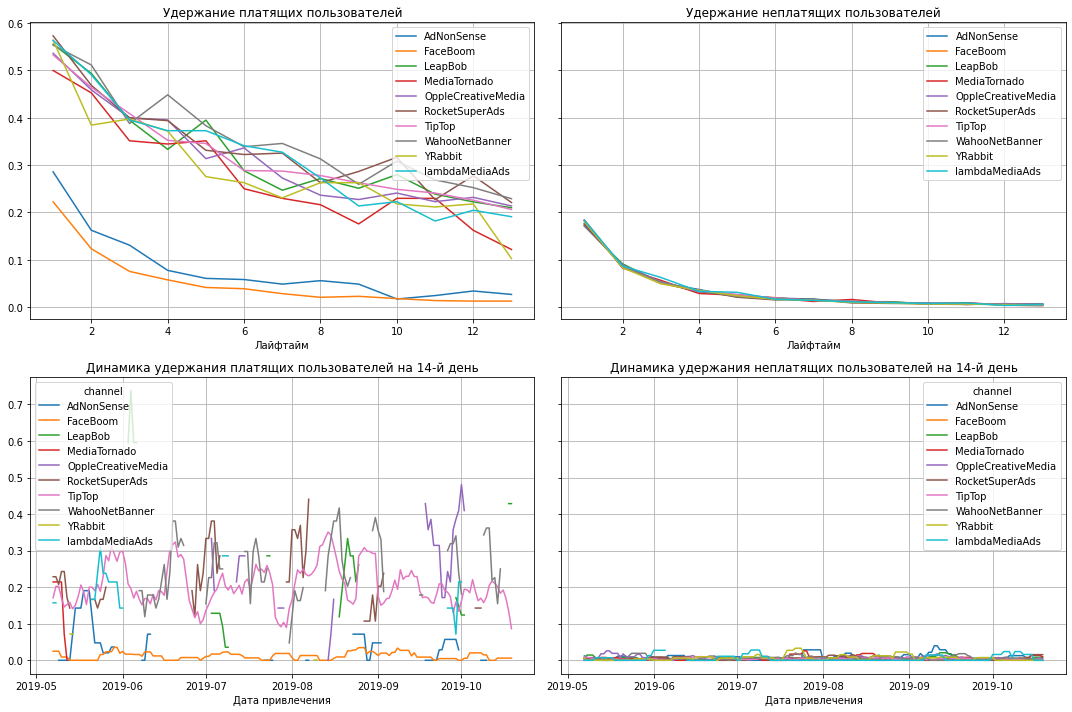

In [54]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей, привлеченных через каналы FaceBoom и AdNonSense, стабильно низкое - к концу второй недели только 1-2%, тогда как для остальных каналов этот показатель более 20%.

* Реклама, направленная на привлечение пользователей, в целом не окупается за две недели.
* Качество всех пользователей достаточно стабильно, хоть и подвержено сезонности.
* Конверсия (8%) и удержание (10% для платящих) пользователей к концу второй недели на достаточно хорошем уровне.
* Маркетинговые расходы увеличиваются с мая по ноябрь 2019 года на 60%.
* В целом окупаемость не сильно зависит от устройства пользователя. Пользователи ПК начинают окупаться лишь с 12-го дня, остальные не окупаются и к концу второй недели. Стоимость привлечения пользователей Mac и iPhone выше.
* Конверсия пользователей PC хуже, чем остальных на 1.5-2%, а удержание платящих пользователей лучше на 3%.
* Пользователи из США не окупаются за две недели, а пользователи из Франции, Великобритании и Германии показывают хорошие показатели. Не смотря на это пользователи из США приносят компании бóльшие доходы. Маркетинговый бюджет в США к ноябрю выше, чем в остальных странах на 130%.
* Пользователи из США конвертируются значительно лучше пользователей из других стран - к концу второй недели конверсия пользователей из США на 5% выше. При этом удерживаются американские пользователи хуже - к концу второй недели на 9% меньше пользователей из Франции и Великобритании.
* Только три рекламных источника не окупаются за две недели - TipTop, AdNonSense и FaceBoom. Именно на них тратятся наибольшие маркетинговые средства.
* Пользователи, привлеченные через каналы FaceBoom, AdNonSense и lambdaMediaAds очень хорошо конвертируются - более 10% за две недели. Не достаточно хорошая конверсия у пользователей, привлеченных с помощью YRabbit, MediaTornado, LeapBob и OppleCreativeMedia - менее 5%. Удержание платящих пользователей, привлеченных через каналы FaceBoom и AdNonSense, стабильно низкое - к концу второй недели только 1-2%, тогда как для остальных каналов этот показатель более 20%.


Таким образом, можно выделить несколько основных проблем, негативно влияющих на общую окупаемость.
* Неокупаемость пользователей iPhone, Mac и Android. Конверсия и удержание этих пользователей на хорошем уровне, поэтому, вероятно, проблема вызвана завышенными маркетинговыми расходами.
* Низкий показатель LTV для пользователей из США, вызванный высокими маркетинговыми расходами и недостаточно хорошим удержанием платящих пользователей.
* Пользователи, привлеченные с помощью каналов TipTop, AdNonSense и FaceBoom, не окупаются. Для канала TipTop это связано прежде всего с высокими затратами на привлечение. Для каналов AdNonSense и FaceBoom также высокие расходы, но еще и плохо удерживаются платящие пользователи, привлеченные через эти каналы.

Проверим, взаимосвязаны ли между собой регионы, устройства и каналы привлечения. Посмотрим как изменится окупаемость, удержание и конверсия, если исключить три неокупающихся канала привлечения - TipTop, AdNonSense и FaceBoom. 

In [55]:
# создадим профили пользователей без 3-х неокупающихся каналов
good_profiles = profiles.query('channel != "AdNonSense" and channel != "FaceBoom" and channel != "TipTop"')

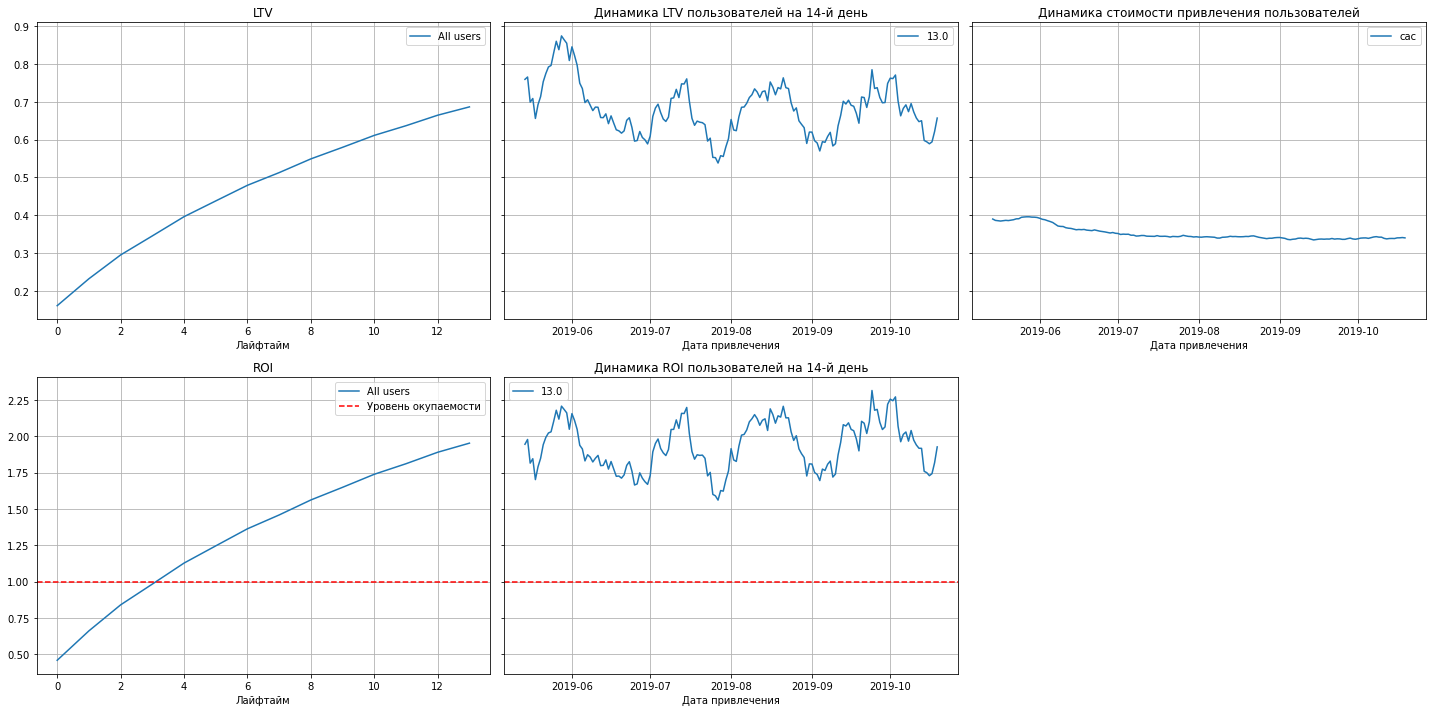

In [56]:
# смотрим окупаемость для оставшихся каналов в целом
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    good_profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Итак, убрав 3 неокупающихся канала, мы видим, что уже с 4-го дня расходы начинают окупаться, а к концу второй недели окупаются уже почти в 2 раза.

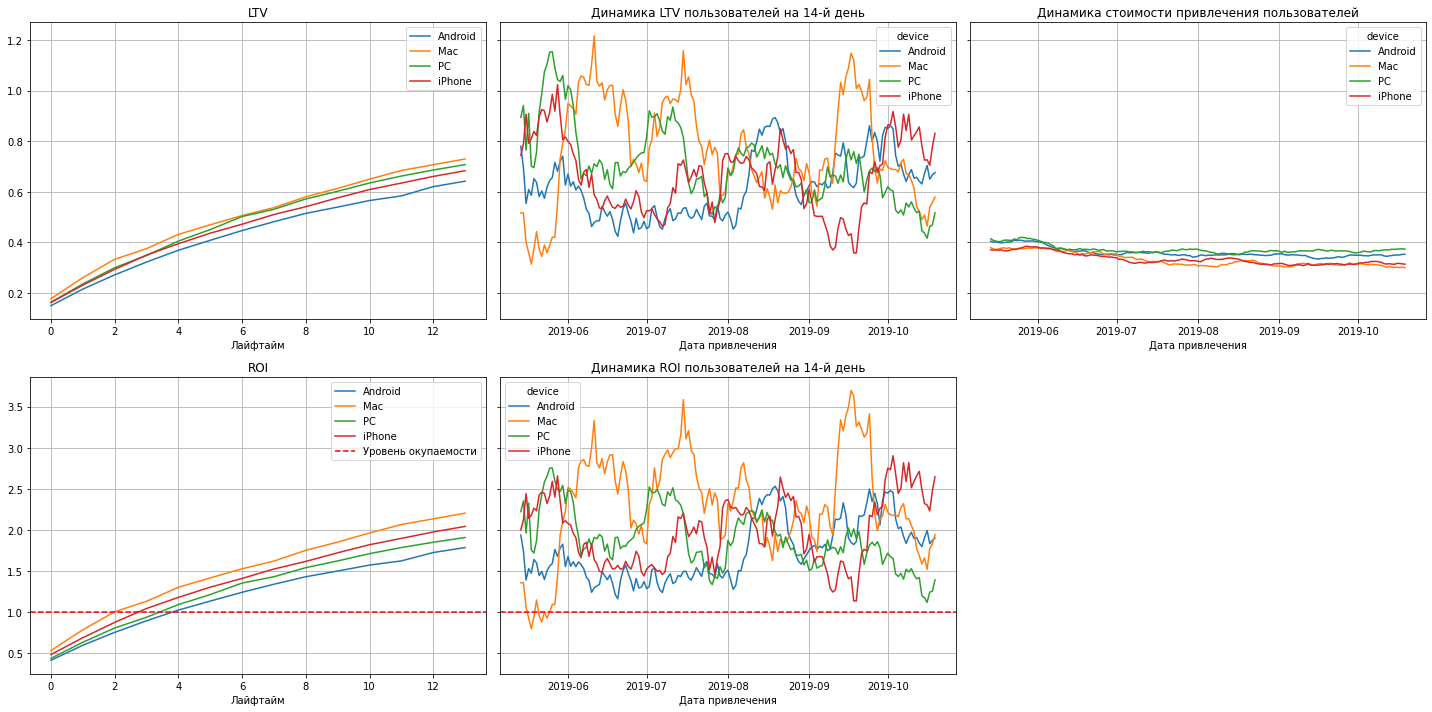

In [57]:
# смотрим окупаемость для оставшихся каналов с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    good_profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Также пользователи всех устройств становятся окупаемыми.

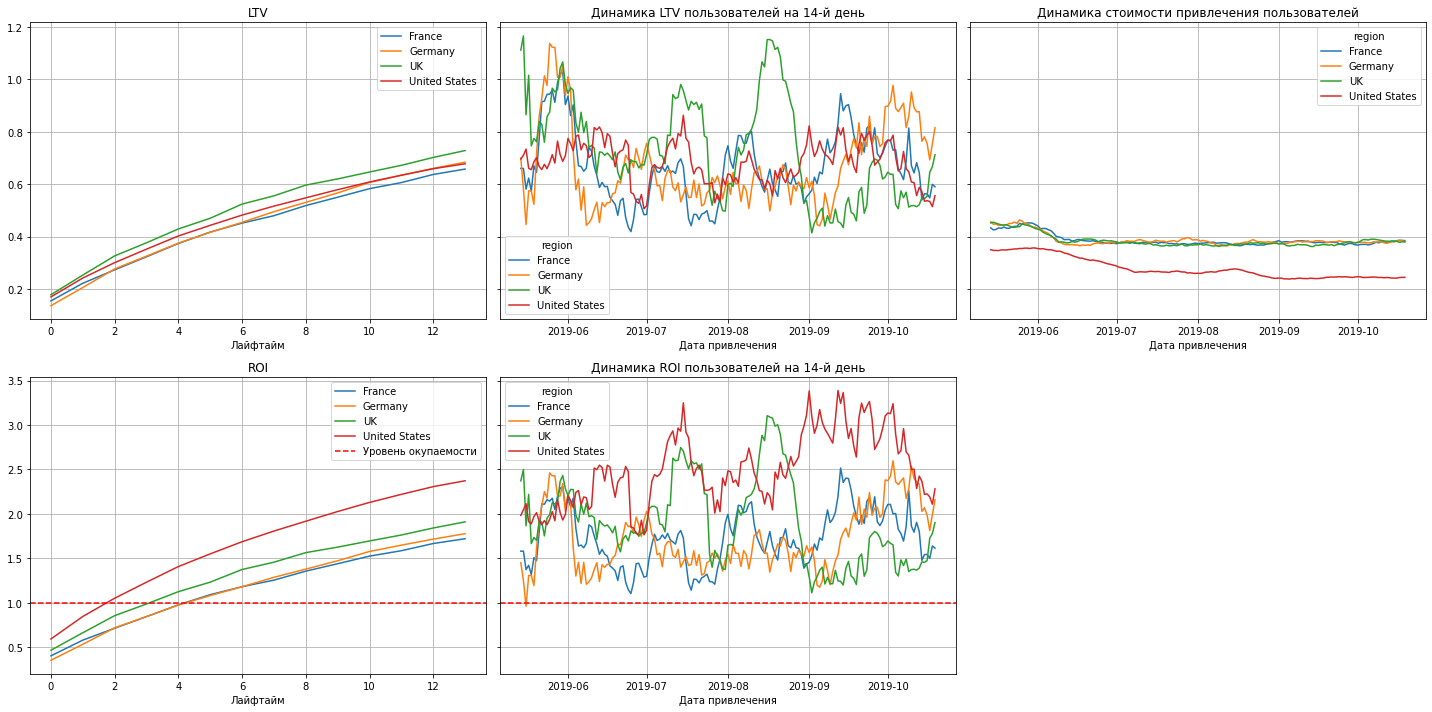

In [58]:
# смотрим окупаемость для оставшихся каналов с разбивкой по регионам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    good_profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Пользователи из всех стран стали хорошо окупаться, причем для США даже лучше, чем для остальных стран.

Проверим теперь конверсию и удержание для пользователей, привлеченных через эти 3 канала.

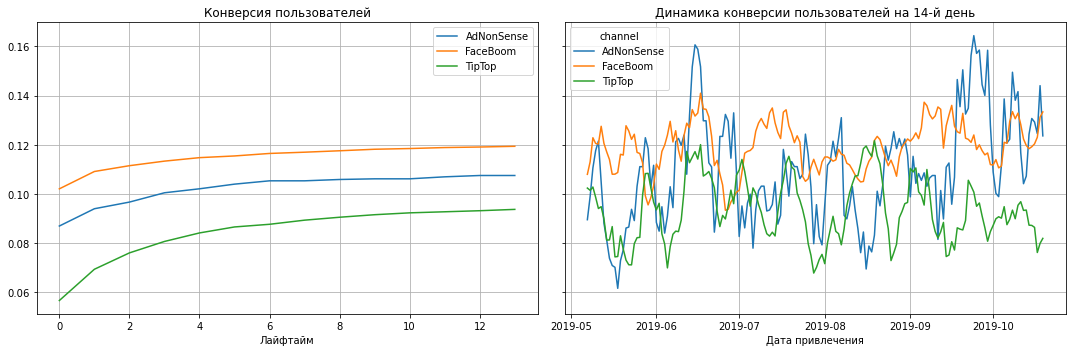

In [59]:
bad_profiles = profiles.query('channel == "AdNonSense" or channel == "FaceBoom" or channel == "TipTop"')
# смотрим конверсию для 3х неокупаемых каналов

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    bad_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Все пользователи, привлеченные по данным каналам, хорошо конвертируются - от 9 до 12% за две недели.

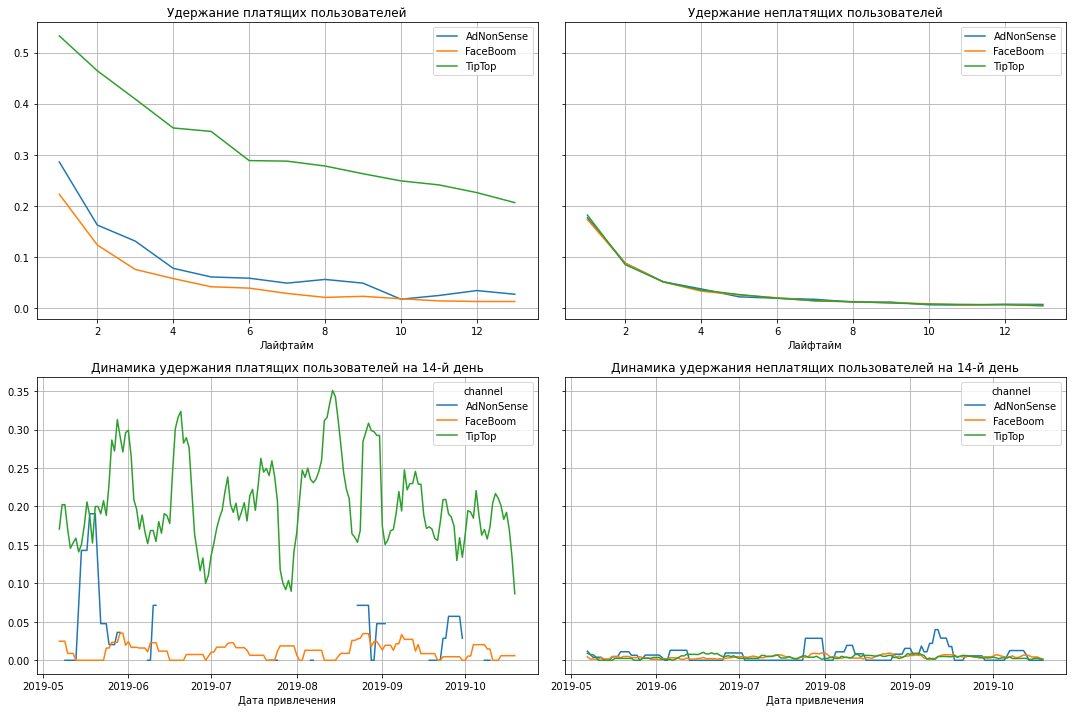

In [60]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    bad_profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

А вот удержание платящих пользователей, привлеченных с помощью `FaceBoom` и `AdNonSense` не достаточно хорошее. В течение всех 14 дней она ниже примерно на 20%, чем пользователей с канала `TipTop`.

Таким образом, негативно сказываются на окупаемости клиенты, привлеченные через каналы `TipTop`, `FaceBoom` и `AdNonSense`. Это три источника с самыми высокими маркетинговыми затратами, особенно выделяется `TipTop`, на этот канал расходуется половина всего маркетингового бюджета. При этом пользователи, привлеченные через каналы `FaceBoom` и `AdNonSense` еще и плохо удерживаются, к концу второй недели удерживается только несколько процентов пользователей.

In [61]:
profiles[(profiles.channel == 'TipTop') | (profiles.channel == 'FaceBoom')].region.unique()

array(['United States'], dtype=object)

По каналам TipTop и FaceBoom привлекаются пользователи только из США, а т.к. это два канала с наибольшим количеством и привлеченных и платящих пользователей, то можно говорить, что именно эти пользователи (привлеченные через TipTop и FaceBoom) оказыват негативное влияние на общую окупаемость пользователей из США. Рассмотрим дополнительно.

In [62]:
usa_profiles = profiles[profiles.region == 'United States']

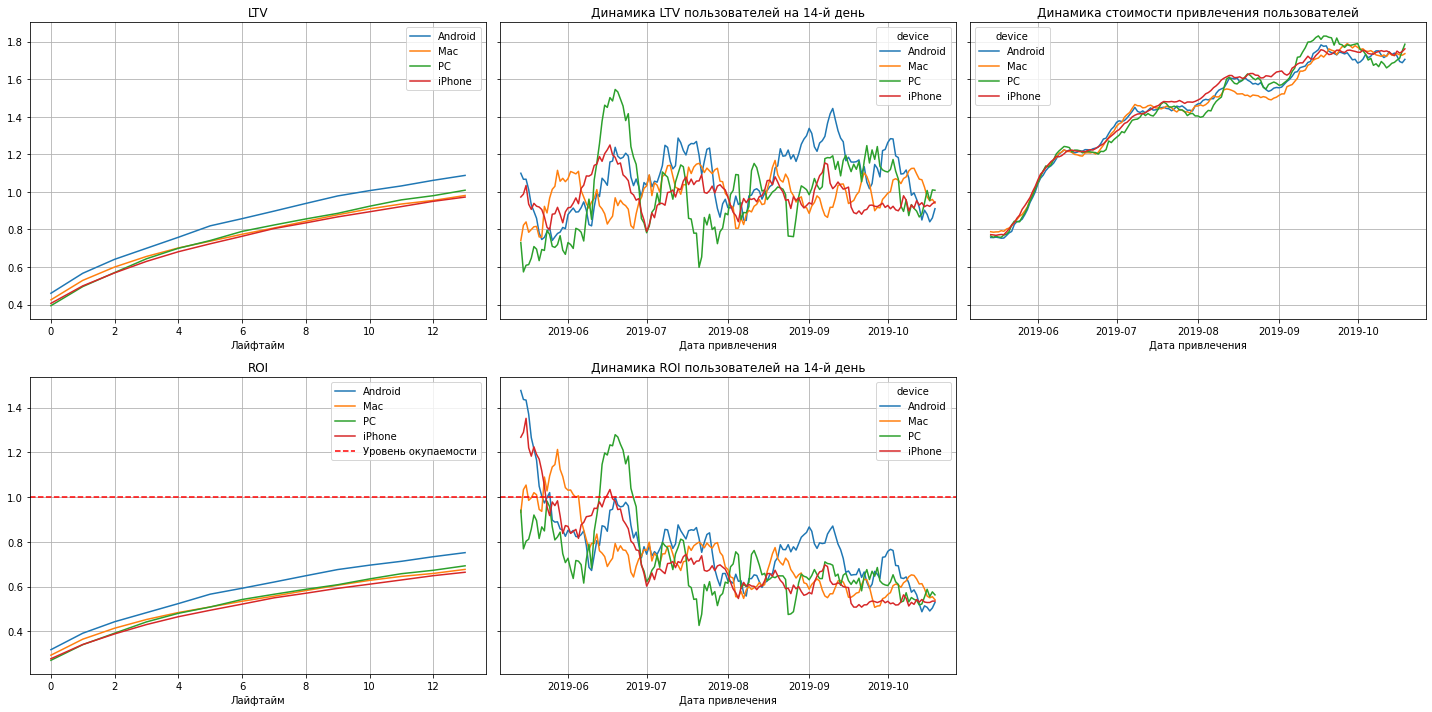

In [63]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa_profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Для всех устройств окупаемость в США плохая, расходы также примерно одинаковы, так что можно сказать, что плохая окупаемость пользователей США не связана с устройством.

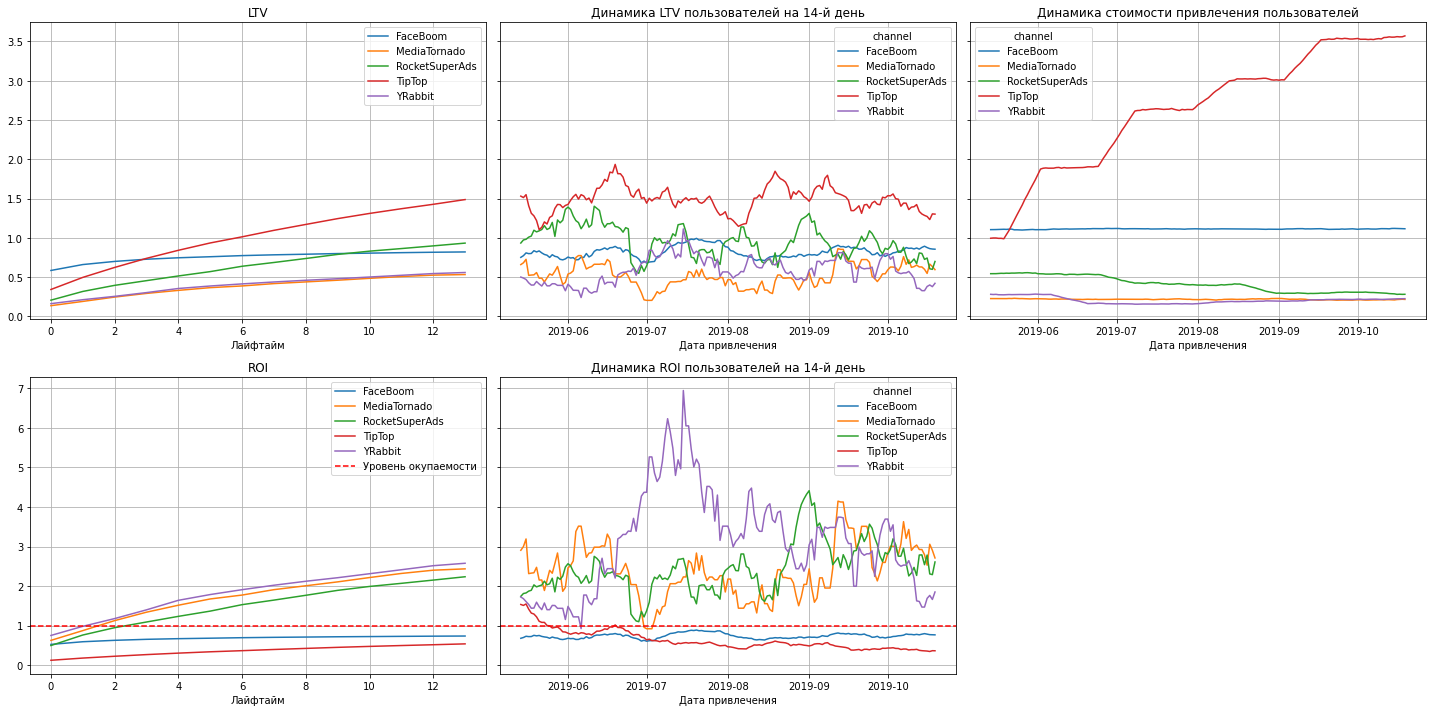

In [64]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Как уже ранее отмечали - не окупаются каналы TipTop и FaceBoom. На эти каналы тратится наибольший маркетинговый бюджет. Как хорошо и стабильно окупающиеся можно рассмотреть каналы MediaTornado, RocketSuperAds и YRabbit.

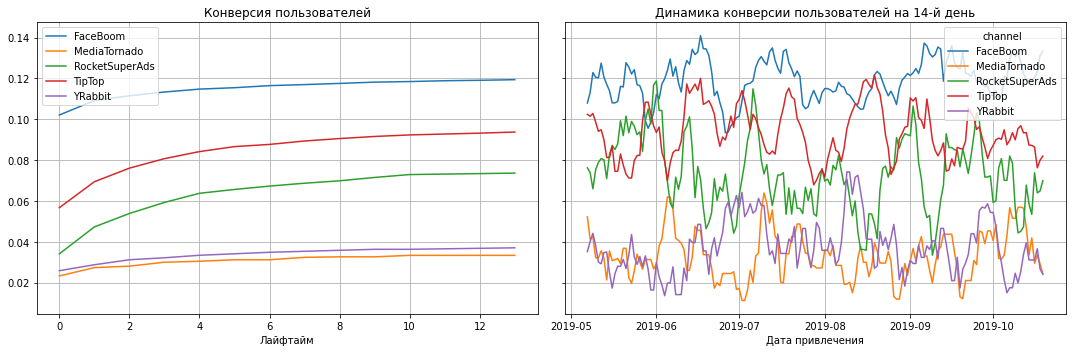

In [65]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    usa_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Однако коверсия американских пользователей лучше у пользователей, привлеченных через каналы TipTop и FaceBoom. А пользователи, привлеченные с помощью MediaTornado и YRabbit плохо конвертируются - ниже 4%.

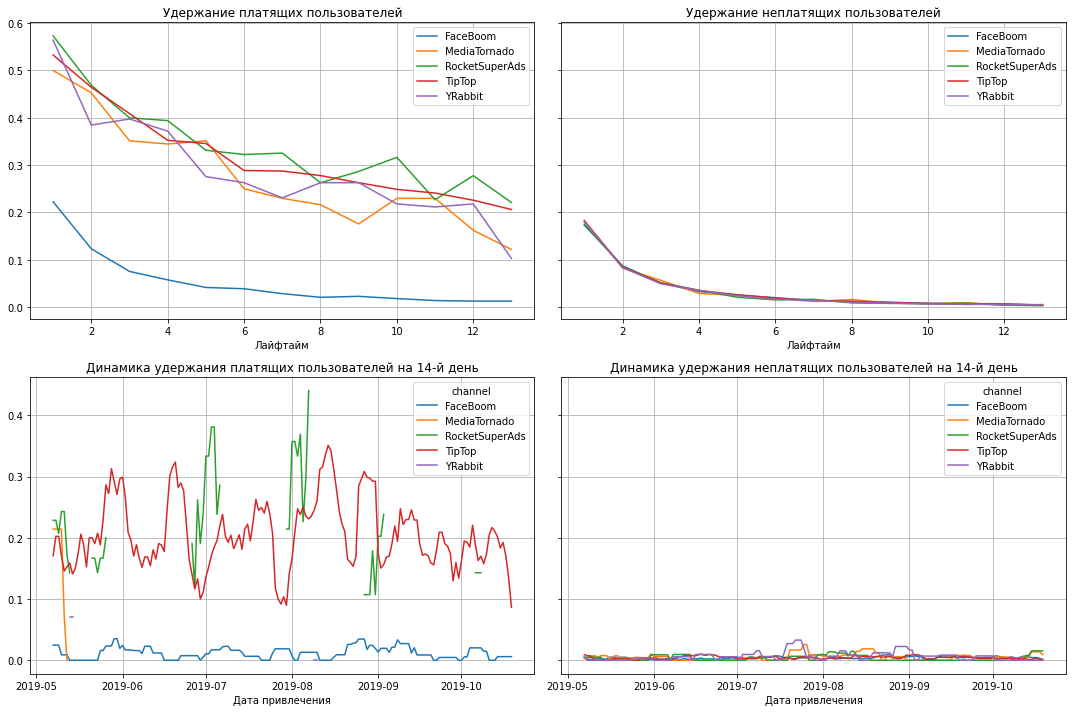

In [66]:
retention_raw, retention_grouped, retention_history = get_retention(
    usa_profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

То же, что видели ранее - плохо удерживаются платящие пользователи, привлеченные через FaceBoom.

Таким образом, можно подытожить, что для пользователей из США негативное влияние на окупаемость оказывает слишком выской маркетинговый бюджет на канал TipTop и плохое удержание пользователей, привлеченных с помощью канала FaceBoom при также высоких расходах на рекламу. Перспективным каналом привлечения, с хорошей конверсией и удержанием платящих пользователей, можно рассматривать канал RocketSuperAds.

Рассмотрим теперь пользователей из Европы.

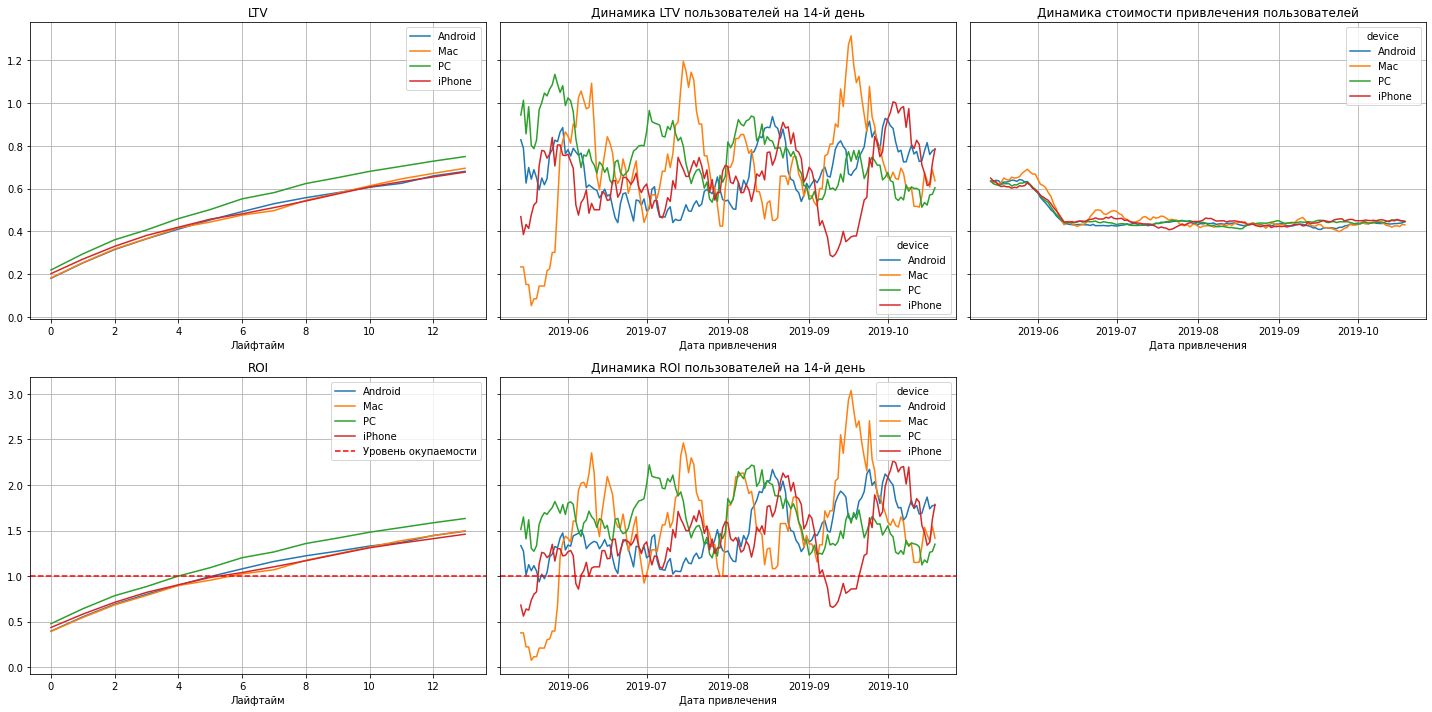

In [67]:
eu_profiles = profiles[(profiles.region == 'France') | (profiles.region == 'UK') | (profiles.region == 'Germany')]
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    eu_profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Европейские пользователи окупаются вне зависимости от устройства, расходы на рекламу также примерно одинаковы. Т.е. также можно говорить, что нет сильной зависимости от устройства пользователей.

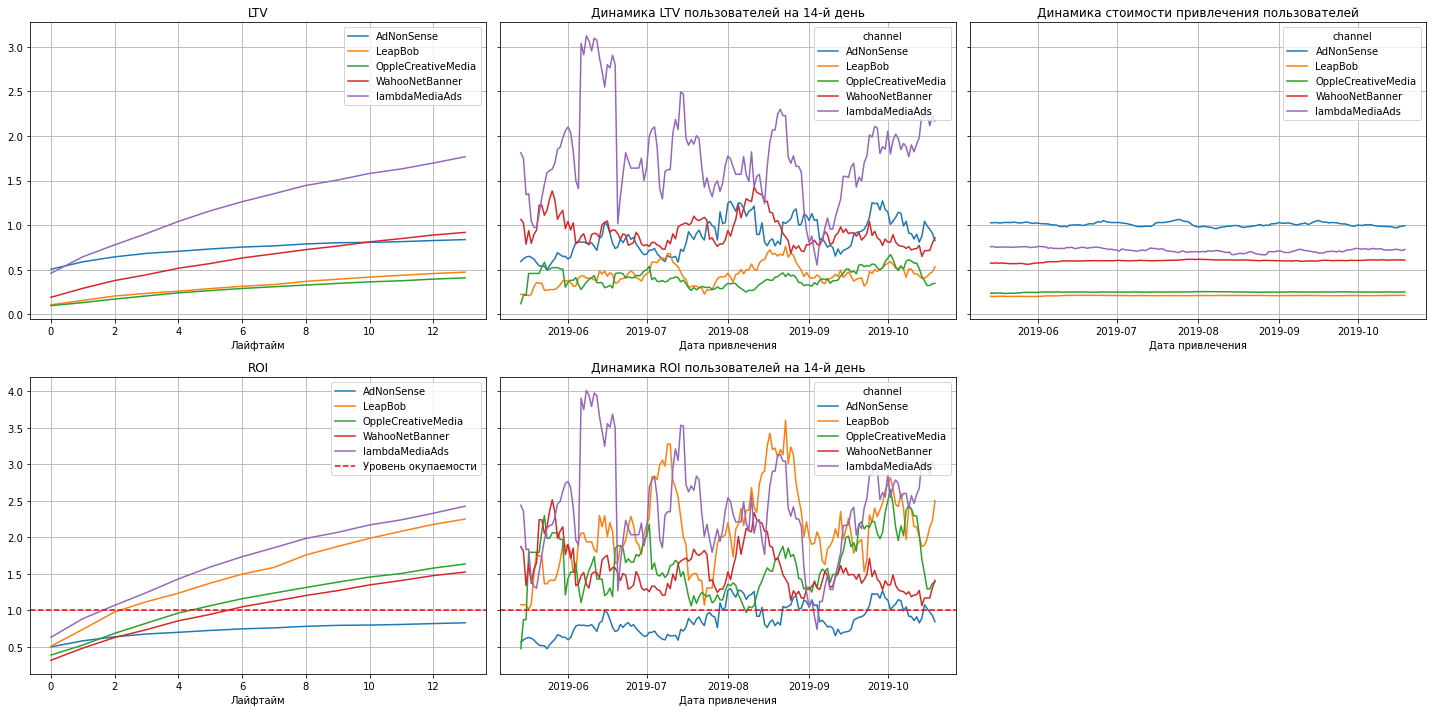

In [68]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    eu_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Окупаются все пользователи, за исключением, привлеченных с помощью AdNonSense, как уже также отмечали ранее. Хорошие показатели у каналов lambdaMediaAds и LeapBob - к концу второй недели показатель ROI более 220%. 

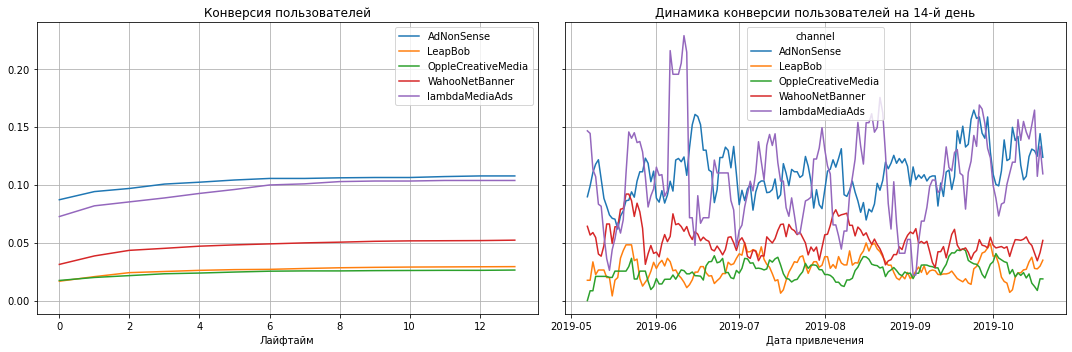

In [69]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    eu_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Не смотря на хоршую окупаемость, конверсия пользователй, привлеченных через LeapBob недостаточно хорошая.

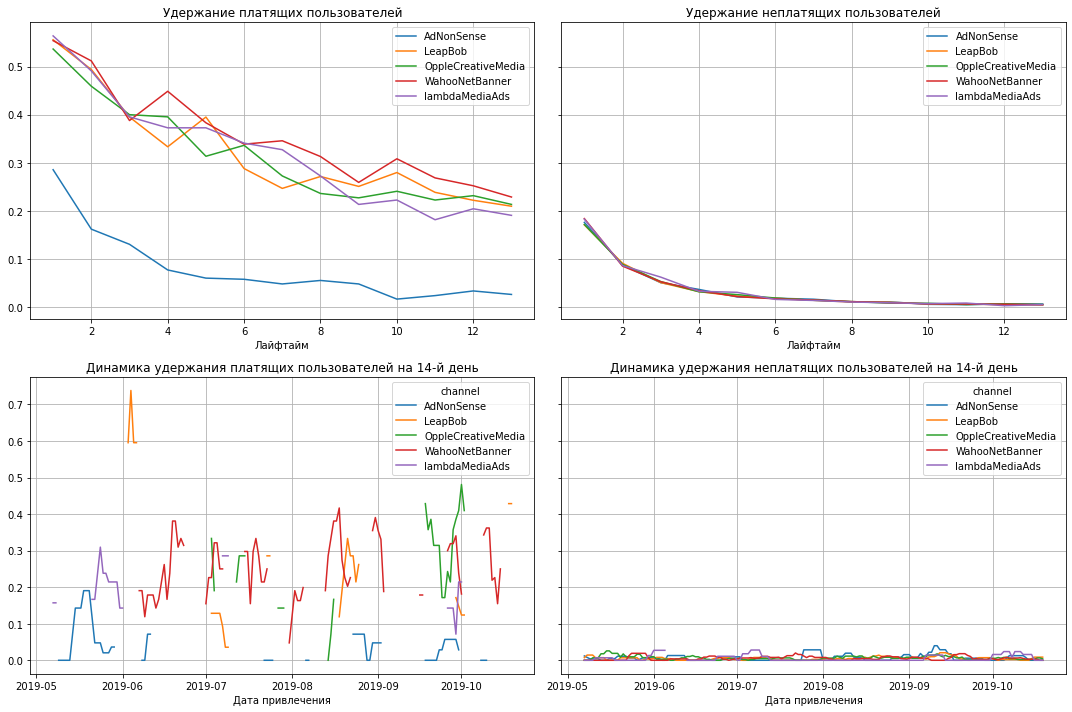

In [70]:
retention_raw, retention_grouped, retention_history = get_retention(
    eu_profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Также как отмечали ранее - плохо удерживаются платящие пользователи, привлеченные через AdNonSense. Остальные удерживаются достаточно хорошо - 20-25% за две недели.

Таким образом, негативное влияние на окупаемость для европейских пользователей оказывают пользователи, привлеченные через канал AdNonSense - канал с самыми высокими маркетинговыми расходами в Европе на пользователя и с самым плохим удержанием платящих пользователей. От устройств LTV не зависит. Перспективным выглядит канал lambdaMediaAds - хорошие показатели окупаемости, конверсии и удержания.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Были проанализированы данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Рассматривали двухнедельную окупаемость. 66% всех пользователей из США, также для этой страны наибольшая доля платящих пользователей - 6,9%. Средняя стоимость расходов на одного пользователя максимальная у пользователей, привлеченных с источника `TipTop` и более чем в 2 раза превышает у идущего следом `FaceBoom`. Платящие пользователи предпочитают `Mac` и `Android`. Всего на маркетинг было потрачено `105497.3`. Почти половина всего бюджета была потрачена на `TipTop`. Средняя стоимость расходов на одного пользователя максимальная у `TipTop` и более чем в 2 раза превышает у идущего следом `FaceBoom`. Низкая средняя стоимость привлечения клиентов у каналов `LeapBob`, `MediaTornado`, `YRabbit` и `OppleCreativeMedia`. 

В целом реклама, направленная на привлечение пользователей, не окупается в течение двух недель. Т.к. наш основной рынок - это рынок США, то неокупаемость рекламы в этом регионе приводит к общей неокупаемости. В целом можно выделить несколько проблем:
* Реклама в США не окупается. Это связано с завышенными маркетинговыми расходами (60% всех расходов в США, в 1.7 раза больше, чем на `FaceBoom`, идущий вторым, и в 14 раз больше чем на все остальные суммарно) на канал привлечения `TipTop`. На источник `FaceBoom` также тратится значительная часть маркетингового бюджета (35% всех расходов в США) при плохом удержании платящих пользователей - только 1.2% к концу второй недели.
* Не смотря на то, что в целом в Европе (Франция, Германия и Великобритания) реклама окупается, есть один канал привлечения, который не оправдывает вложения в него. Стоимость привлечения пользователя с помощью канала `AdNonSense` самая высокая в Европе, а удержание платящих пользователей всего 2% к концу второй недели.

Устройство пользователя не влияет на окупаемость как в США, так и в Европе. Перспективным каналом привлечения можно считать `RocketSuperAds` в США и `lambdaMediaAds` в Европе.